<a href="https://colab.research.google.com/github/AjMing/Pattern-EGCI463/blob/main/Week4-5/Weight_Height_logistic_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data
    Assume the data is in my(your) drive!!
    You can import the data from data upload

In [41]:
import numpy as np
import pandas as pd
import math as mt
from google.colab import drive
drive.mount("/content/drive",force_remount=True)
path="/content/drive/My Drive/data/Weight_Height_M_W.csv"
df =pd.read_csv(path)

Mounted at /content/drive


# Show the data content

In [ ]:
df

,Height,Weight,gender
0,159.7415,57.2608,W
1,157.2365,53.1664,W
2,158.8578,49.5106,W
3,157.4017,54.1508,W
4,156.2003,52.2173,W
...,...,...,...
96,172.1863,63.6287,M
97,168.9630,55.1719,M
98,172.8701,53.6238,M
99,171.1873,62.8852,M


# Prepare the input data by splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

# Logistic Regression

# Create (Select) a Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#Train the model

In [ ]:
model=model.fit(X, y)

# Test the model

In [ ]:
y_pred= model.predict(X_test)

y_probs = model.predict_proba(X_test)
y_log_probs = model.predict_log_proba(X_test)

Show the output prediction

In [ ]:
print(y_pred)
print(np.array(y_test))

['M' 'M' 'W' 'M' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'M' 'W' 'M' 'W' 'M' 'M'
 'W' 'W' 'M']
['M' 'M' 'M' 'M' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'M' 'W' 'M' 'W' 'M' 'M'
 'W' 'W' 'M']


Log_prob (show the exponantial of the log value)

In [ ]:
print(np.exp(y_log_probs))

[[9.99571813e-01 4.28187152e-04]
 [9.99954726e-01 4.52736757e-05]
 [2.54512738e-01 7.45487262e-01]
 [9.99999972e-01 2.83715733e-08]
 [5.40669520e-06 9.99994593e-01]
 [2.33585998e-06 9.99997664e-01]
 [3.90420313e-05 9.99960958e-01]
 [1.10291782e-05 9.99988971e-01]
 [2.38982754e-03 9.97610172e-01]
 [1.09200639e-02 9.89079936e-01]
 [3.20083392e-01 6.79916608e-01]
 [2.87464824e-04 9.99712535e-01]
 [9.99986401e-01 1.35991025e-05]
 [8.56849977e-06 9.99991432e-01]
 [9.95173887e-01 4.82611330e-03]
 [3.50162286e-05 9.99964984e-01]
 [9.99999893e-01 1.07136256e-07]
 [9.99999956e-01 4.43643968e-08]
 [8.75779978e-04 9.99124220e-01]
 [1.33405973e-03 9.98665940e-01]
 [9.99903745e-01 9.62549713e-05]]


Show the softmax of the prediction

In [ ]:
print(f"{np.array2string(y_probs, formatter={'float': lambda x: f'{x:.2f}'}, separator=', ')}")


[[1.00, 0.00],
 [1.00, 0.00],
 [0.25, 0.75],
 [1.00, 0.00],
 [0.00, 1.00],
 [0.00, 1.00],
 [0.00, 1.00],
 [0.00, 1.00],
 [0.00, 1.00],
 [0.01, 0.99],
 [0.32, 0.68],
 [0.00, 1.00],
 [1.00, 0.00],
 [0.00, 1.00],
 [1.00, 0.00],
 [0.00, 1.00],
 [1.00, 0.00],
 [1.00, 0.00],
 [0.00, 1.00],
 [0.00, 1.00],
 [1.00, 0.00]]


# Perform a ROC curve from 2 selected data

ROC of the second line, Iris-versicolor

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
lr_precision, lr_recall, thresholds= precision_recall_curve(y_test=='M', y_probs[:,1])
lr_f1= f1_score(y_test=='M', y_pred=='M')
lr_auc= auc(lr_recall, lr_precision)

In [ ]:
thresholds

array([2.83715733e-08, 4.43643968e-08, 1.07136256e-07, 1.35991025e-05,
       4.52736757e-05, 9.62549713e-05, 4.28187152e-04, 4.82611330e-03,
       6.79916608e-01, 7.45487262e-01, 9.89079936e-01, 9.97610172e-01,
       9.98665940e-01, 9.99124220e-01, 9.99712535e-01, 9.99960958e-01,
       9.99964984e-01, 9.99988971e-01, 9.99991432e-01, 9.99994593e-01,
       9.99997664e-01])

In [ ]:
lr_precision

array([0.42857143, 0.4       , 0.36842105, 0.33333333, 0.29411765,
       0.25      , 0.2       , 0.14285714, 0.07692308, 0.08333333,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        ])

In [ ]:
lr_recall

array([1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
       0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.11111111,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [51]:
 print("Auc is %.2f" % lr_auc)
 print("F1 is %.2f" % lr_f1)


Auc is 0.25
F1 is 0.94


# (Optional) Create a Decision Boudary Contour

Create a scope of xx and yy contour

In [52]:
x_min, x_max = 150, 180
y_min, y_max = 30, 80
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

In [70]:
z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [71]:
z.shape

(2500, 2)

In [72]:
z = z[:,0].reshape(xx.shape)

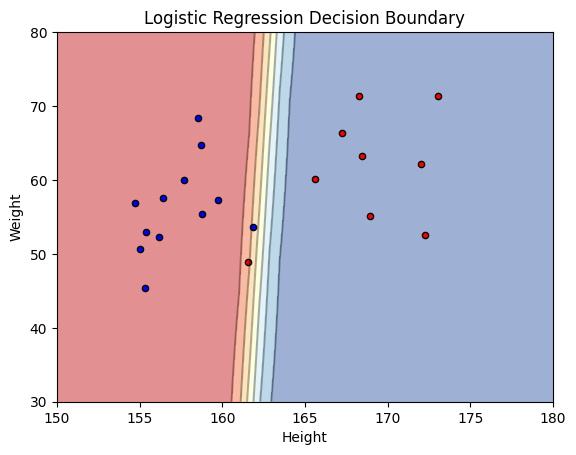

In [105]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
c = ax.contourf(xx, yy, z, cmap='RdYlBu', alpha=0.5)
c1 = ax.contour(xx, yy, z, colors='black', alpha=0.30)

plt.scatter(X_test[y_test=='M'].iloc[:,0], X_test[y_test=='M'].iloc[:,1], c='r',  edgecolor='k', s=20)
plt.scatter(X_test[y_test=='W'].iloc[:,0], X_test[y_test=='W'].iloc[:,1], c='b',  edgecolor='k', s=20)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_title('Logistic Regression Decision Boundary')
plt.show()

# ROC CURVE

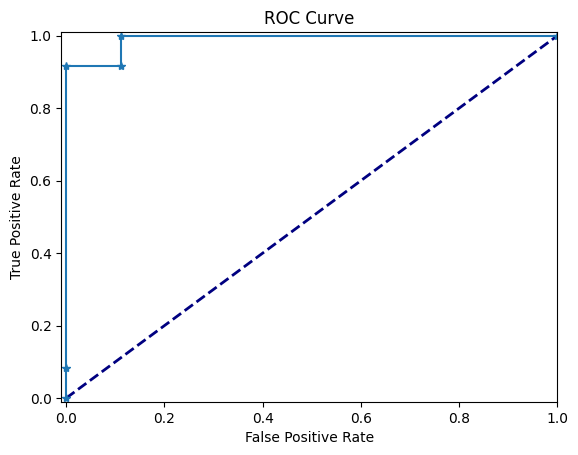

In [132]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test=='W', y_probs[:,1])
plt.scatter
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr,tpr,"*-")
plt.title('ROC Curve')
plt.show()

In [131]:
 print(thresholds)


[           inf 9.99999972e-01 9.95173887e-01 3.20083392e-01
 2.54512738e-01 2.33585998e-06]
